In [13]:
# Libraries

! pip install --user pycm

import os, cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras import backend as K
from keras.models import Model, Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical

import os, cv2
from tqdm import tqdm

from pycm import *

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [14]:
X=[]
Z=[]

IMG_SIZE=256

ACCENT_ENGLISH_DIR='../input/accent-data/english/'
ACCENT_FRENCH_DIR='../input/accent-data/french/'
ACCENT_GERMAN_DIR='../input/accent-data/german/'
ACCENT_HINDI_DIR='../input/accent-data/hindi/'
ACCENT_ARABIC_DIR='../input/accent-data/arabic/'

In [15]:
def target(img, nationality):
    return nationality

In [16]:
def data_creation(nationality,DIR):
    for img in tqdm(os.listdir(DIR)):
        name = img
        label = target(img,nationality)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append([str(label),name])

In [17]:
# Creation of the data corresponding to the 5 accents

data_creation('english',ACCENT_ENGLISH_DIR)
data_creation('french',ACCENT_FRENCH_DIR)
data_creation('german',ACCENT_GERMAN_DIR)
data_creation('hindi',ACCENT_HINDI_DIR)
data_creation('arabic',ACCENT_ARABIC_DIR)

100%|██████████| 102/102 [00:01<00:00, 73.40it/s]


In [18]:
def equal_list(l1, l2):
    for i in range(len(l2)):
        if l1[i] != l2[i]:
            return False
    return True

In [19]:
# We transform the data in a way understandable by a Deep-Learning model

le = LabelEncoder()
L = []
for i in range(len(Z)):
    L.append(Z[i][0])
Y = le.fit_transform(L)
Y = to_categorical(Y,5)
l = []
for i in range(len(Y)):
    l.append([Y[i], Z[i][1]])
Y = l
X = np.array(X)
X = X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [20]:
# We build y_train and y_test (with just the labels)

train_list = []
for l in y_train:
    train_list.append(l[0])

test_list = []
for l in y_test:
    test_list.append(l[0])

y_train = train_list
y_test = test_list

In [21]:
# We turn y_train and y_test into a single array, so we can use it in the model

for i in range(len(y_train)):
    y_train[i] = list(y_train[i])
y_train = np.asarray(y_train)

for i in range(len(y_test)):
    y_test[i] = list(y_test[i])
y_test = np.asarray(y_test)

y_test[:10]

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

# **Convolutional Neural Network**

In [22]:
## Convolutional Network
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 96)        55392     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 96)       

In [23]:
batch_size=50
epochs=200

history = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/200
6/6 [==============================] - 1s 106ms/step - loss: 2.4039 - accuracy: 0.3200 - val_loss: 1.4033 - val_accuracy: 0.4022
Epoch 2/200
6/6 [==============================] - 1s 86ms/step - loss: 1.3488 - accuracy: 0.5091 - val_loss: 1.3101 - val_accuracy: 0.5543
Epoch 3/200
6/6 [==============================] - 1s 88ms/step - loss: 1.1939 - accuracy: 0.6691 - val_loss: 1.0025 - val_accuracy: 0.6522
Epoch 4/200
6/6 [==============================] - 1s 86ms/step - loss: 0.8980 - accuracy: 0.6909 - val_loss: 0.8540 - val_accuracy: 0.6304
Epoch 5/200
6/6 [==============================] - 1s 84ms/step - loss: 0.8218 - accuracy: 0.6618 - val_loss: 0.8973 - val_accuracy: 0.6522
Epoch 6/200
6/6 [==============================] - 0s 83ms/step - loss: 0.8077 - accuracy: 0.6909 - val_loss: 0.8392 - val_accuracy: 0.6522
Epoch 7/200
6/6 [==============================] - 1s 88ms/step - loss: 0.7985 - accuracy: 0.6909 - val_loss: 0.8244 - val_accuracy: 0.6522
Epoch 8/200
6/6 [==

6/6 [==============================] - 1s 85ms/step - loss: 1.5336e-04 - accuracy: 1.0000 - val_loss: 2.7212 - val_accuracy: 0.6848
Epoch 59/200
6/6 [==============================] - 1s 87ms/step - loss: 1.3837e-04 - accuracy: 1.0000 - val_loss: 2.7561 - val_accuracy: 0.6848
Epoch 60/200
6/6 [==============================] - 1s 89ms/step - loss: 1.2748e-04 - accuracy: 1.0000 - val_loss: 2.7568 - val_accuracy: 0.6848
Epoch 61/200
6/6 [==============================] - 1s 85ms/step - loss: 1.1533e-04 - accuracy: 1.0000 - val_loss: 2.7658 - val_accuracy: 0.6739
Epoch 62/200
6/6 [==============================] - 1s 101ms/step - loss: 1.0819e-04 - accuracy: 1.0000 - val_loss: 2.7923 - val_accuracy: 0.6848
Epoch 63/200
6/6 [==============================] - 1s 92ms/step - loss: 9.8901e-05 - accuracy: 1.0000 - val_loss: 2.8206 - val_accuracy: 0.6848
Epoch 64/200
6/6 [==============================] - 1s 84ms/step - loss: 9.1941e-05 - accuracy: 1.0000 - val_loss: 2.8280 - val_accuracy: 0.68

6/6 [==============================] - 1s 84ms/step - loss: 1.1235e-05 - accuracy: 1.0000 - val_loss: 3.3426 - val_accuracy: 0.6957
Epoch 115/200
6/6 [==============================] - 0s 82ms/step - loss: 1.1093e-05 - accuracy: 1.0000 - val_loss: 3.3468 - val_accuracy: 0.6957
Epoch 116/200
6/6 [==============================] - 1s 87ms/step - loss: 1.0644e-05 - accuracy: 1.0000 - val_loss: 3.3591 - val_accuracy: 0.6957
Epoch 117/200
6/6 [==============================] - 1s 99ms/step - loss: 1.0398e-05 - accuracy: 1.0000 - val_loss: 3.3701 - val_accuracy: 0.6957
Epoch 118/200
6/6 [==============================] - 1s 91ms/step - loss: 1.0254e-05 - accuracy: 1.0000 - val_loss: 3.3849 - val_accuracy: 0.6957
Epoch 119/200
6/6 [==============================] - 1s 87ms/step - loss: 9.9410e-06 - accuracy: 1.0000 - val_loss: 3.3708 - val_accuracy: 0.6957
Epoch 120/200
6/6 [==============================] - 1s 86ms/step - loss: 9.6905e-06 - accuracy: 1.0000 - val_loss: 3.3821 - val_accuracy:

6/6 [==============================] - 1s 87ms/step - loss: 3.8957e-06 - accuracy: 1.0000 - val_loss: 3.6194 - val_accuracy: 0.6739
Epoch 171/200
6/6 [==============================] - 1s 94ms/step - loss: 3.8272e-06 - accuracy: 1.0000 - val_loss: 3.6255 - val_accuracy: 0.6739
Epoch 172/200
6/6 [==============================] - 1s 98ms/step - loss: 3.7501e-06 - accuracy: 1.0000 - val_loss: 3.6272 - val_accuracy: 0.6739
Epoch 173/200
6/6 [==============================] - 1s 87ms/step - loss: 3.6864e-06 - accuracy: 1.0000 - val_loss: 3.6287 - val_accuracy: 0.6739
Epoch 174/200
6/6 [==============================] - 1s 89ms/step - loss: 3.6465e-06 - accuracy: 1.0000 - val_loss: 3.6292 - val_accuracy: 0.6848
Epoch 175/200
6/6 [==============================] - 1s 87ms/step - loss: 3.5880e-06 - accuracy: 1.0000 - val_loss: 3.6359 - val_accuracy: 0.6739
Epoch 176/200
6/6 [==============================] - 1s 85ms/step - loss: 3.5312e-06 - accuracy: 1.0000 - val_loss: 3.6419 - val_accuracy:

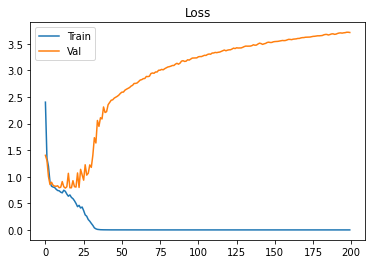

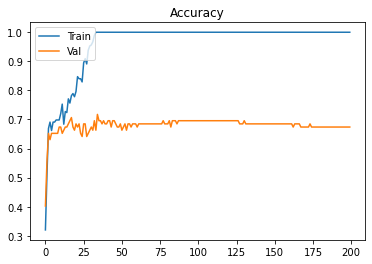

In [24]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

acc_val_curve = history.history["val_accuracy"]
loss_val_curve = history.history["val_loss"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()